# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

Identify key drivers for used car prices.  As per CRISP-DM overview, convert this business framing to a data problem definition.  Reframe the task as a data task with the appropriate technical vocabulary. 

Business need is to understand what factors make a car more or less expensive, thereby understand customer choices that lead to a higher willingness to pay (WTP), thereby increasing its bottomline.
We assume the dealership addresses the needs of common man primarily i.e standard set of make-model cars. Vintage / Antique or high end cars will be valued on an individual basis and not through this model. 
For analysis purpose, we need data of various choices (indpendent variables) our sales offers and customers seek and the corresponding cars price (dependent variable).


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
- Review the dataset to identify independent variables that matter
- Cleanse the dataset by removing columns that add little to no value to the outcome, including columns with large data missing
- Convert categorical vars to numeric. Fill any NIL values in key columns with data.
NOTE : The fundamental assumption we make is, the dealership is looking at pricing general cars and not antiques / vintage or custom built or one-off cars.

In [164]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [220]:
used_cars_df = pd.read_csv('./data/vehicles.csv')
# used_cars_df.info()
print('columns list: ', used_cars_df.columns)


columns list:  Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [221]:
# from the list of columns, ones that do not provide much value for a buyer are :
# id - seems like a random id given by the dealer,
# VIN - A unique identifier of the vehicle which Has no value when determining price
# drop columns
used_cars_df.drop(columns=['id', 'VIN'], inplace=True, axis=1)



In [222]:
# print(used_cars_df.head())
# print(used_cars_df.tail())

print('Total # of records= ', len(used_cars_df))
# Print the count of 0 values for each Columns that has 0 in its cell(s)
#print("Cells that have 0 value: \n", used_cars_df.eq(0).sum())
cols_with_zero_vals = used_cars_df.eq(0).sum()
print('(Numeric) Columns that have 0 values in cells and their count=\n', cols_with_zero_vals[cols_with_zero_vals > 0])
# Get a count of all NaNs and if columns have
print('Count of all NaNs= \n',used_cars_df.isnull().sum())
# Get stats for each column
print('Describe: \n',used_cars_df.describe())

#used_cars_df.convert_dtypes()
print(used_cars_df.info())



Total # of records=  426880
(Numeric) Columns that have 0 values in cells and their count=
 price       32895
odometer     1965
dtype: int64
Count of all NaNs= 
 region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Describe: 
               price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07
<cla

In [223]:
# Evaluating state vs region
print('State: ', used_cars_df['state'].unique())
print('Region: ', used_cars_df['region'].unique())

# state and region columns largely serve the same purpose. While Region values are a mix of state, county, city etc.,
# state is more consistent although at a more coarse level. Hence lets drop Region column


State:  ['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']
Region:  ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey 

##### Data analysis of Numeric columns

In [224]:


def is_invalid_price(num):
    num_str = str(num)
    one_digit = (len(set(num_str)) == 1)


# --------- YEAR -----------
used_cars_df['year'].value_counts().to_csv('analysis/year_data_frequency.csv')
# Year with value of NaN will be normalized to a number i.e 0 to help set the column dtype
used_cars_df['year'] = used_cars_df['year'].replace([np.nan, np.inf], 0).astype('Int64')
## Given dealership has cars as old as 1900, we are going to make a call here :
### any car with Year < 1970 is a vintage and priced differently
before_year_1970 = used_cars_df.loc[used_cars_df['year'] < 1970]
print('# of cars with Year built before 1970= ', len(before_year_1970))

# ----------- Price -----------
used_cars_df['price'].value_counts().to_csv('analysis/price_data_frequency.csv')
# Based on the first print stmt above, 32895 rows have a price of 0. In other words, bad data most likely
## From visual research of data, we will drop cars that hv :
### a price of zero (although we can impute values, we will focus on normal cars)
### any car priced < 2000 is not worth the sales person time and inventory costs : 52977 records
### car priced > 200K is considered vintage and hence we drop them
### car priced with weird numbers 1234567 or 1111111
price_less_2000 = used_cars_df.query("price < 2000 or price > 200000")
print('# of cars with Price less than 2000 OR greater than 200K = ', len(price_less_2000))

# ------------ Odometer --------------
used_cars_df['odometer'] = used_cars_df['odometer'].replace([np.nan, np.inf], 0).astype('Int64')
used_cars_df['odometer'].value_counts().to_csv('analysis/odometer_data_frequency.csv')
# Odometer with value of NaN will be normalized to a number i.e 0
# used_cars_df['odometer'] = used_cars_df['odometer'].replace([np.nan, np.inf], 0).astype('Int64')

odo_miles_above_100k = used_cars_df.loc[used_cars_df['odometer'] > 100000]
odo_miles_above_100k.to_csv('analysis/odometer_100k.csv')
print('# of cars with Odomoter miles more than 100k= ', len(odo_miles_above_100k))
# -- Summary of Odometer analysis :
## Based on G search (https://www.google.com/search?client=firefox-b-1-d&q=any+car+driven+million+mile), max # of miles driven by a car is 3.2M miles.
## Also looking at the data, a lot of obvious bad data 2020+ model wih 1M miles, etc..
## Given the abv, we will drop cars that hv :
### more than 1M miles and dated 2013 or above (per abv G search 2013 Hyundai hit 1M).
# -- need to input 'engine' param to avoid warning msg. Refer https://github.com/pandas-dev/pandas/issues/29027
print('# of cars with miles gt than 1M and year > 2013= ', len(used_cars_df.query('odometer > 1000000 and year > 2013', engine='python')))

print('# of all NaNs in Odometer values= ',used_cars_df['odometer'].isnull().sum())



# of cars with Year built before 1970=  6487
# of cars with Price less than 2000 OR greater than 200K =  53101
# of cars with Odomoter miles more than 100k=  175339
# of cars with miles gt than 1M and year > 2013=  91
# of all NaNs in Odometer values=  0


##### Data Analysis of Non-Numeric columns

In [225]:
# -- Below stmt errors out ""
print("Describe: ", used_cars_df.describe(exclude=[int, float]))

# -------- Size --------------
print("Values for size: ", used_cars_df['size'].unique())


# ------------- manufacturer and Model --------------
print('Unique Manufacturer values= ', used_cars_df['manufacturer'].unique())
print('# of Unique Manufacturer values= ', len(used_cars_df['manufacturer'].unique()))
print('# of NaNs for Manufacturer : ', used_cars_df['manufacturer'].isna().sum())
print('# of unique values for Model= ', len(used_cars_df['model'].unique()))
manuf_model_unique_vals = used_cars_df[['model', 'manufacturer']].drop_duplicates()
print('# of unique values for Manufacturer AND Model= ', len(manuf_model_unique_vals))
manuf_model_unique_vals.to_csv('analysis/manuf_model_unique_values.csv')
used_cars_df[['model', 'manufacturer']].value_counts().to_csv('analysis/manuf_model_freq_count.csv')
#used_cars_df['make'].value_counts().to_csv('analysis/model_freq_count.csv')
# ----- Summary of Manufacturer and Model analysis :
## Manufacturer : 17646 rows have NaNs.
## Model : 29650 unique values
## There are 24168 unique Model names in the file.
### Combination of Manuf and Model results in 30251 unique combinations

# -------------- Type ----------------
print('Unique Type values= ', used_cars_df['type'].unique())
print('# of NANs in Type column = ', used_cars_df['type'].isna().sum())



Describe:            region manufacturer   model condition    cylinders    fuel  \
count     426880       409234  421603    252776       249202  423867   
unique       404           42   29649         6            8       5   
top     columbus         ford   f-150      good  6 cylinders     gas   
freq        3608        70985    8009    121456        94169  356209   

       title_status transmission   drive       size    type paint_color  \
count        418638       424324  296313     120519  334022      296677   
unique            6            3       3          4      13          12   
top           clean    automatic     4wd  full-size   sedan       white   
freq         405117       336524  131904      63465   87056       79285   

         state  
count   426880  
unique      51  
top         ca  
freq     50614  
Values for size:  [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
Unique Manufacturer values=  [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

- Remove columns with less than 50% of data
- Run PCA or other techniques to reduce dimensionality
- Identify models to evaluate the data - Linear or polynomial (to what degree) regression
- 

In [226]:
# Given column size has more than half (306361 / 426880) of its values missing. Region is dup of state and for this arg we will focus at pricing at a state level.
# Assume these columns have lesser significance on the Price, drop these columns
used_cars_df.drop(columns=['size', 'region'], inplace=True, axis=1)
used_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         426880 non-null  int64 
 1   year          426880 non-null  Int64 
 2   manufacturer  409234 non-null  object
 3   model         421603 non-null  object
 4   condition     252776 non-null  object
 5   cylinders     249202 non-null  object
 6   fuel          423867 non-null  object
 7   odometer      426880 non-null  Int64 
 8   title_status  418638 non-null  object
 9   transmission  424324 non-null  object
 10  drive         296313 non-null  object
 11  type          334022 non-null  object
 12  paint_color   296677 non-null  object
 13  state         426880 non-null  object
dtypes: Int64(2), int64(1), object(11)
memory usage: 46.4+ MB


In [227]:
# ------------ YEAR -------------
# Remove rows that have Year as N/A i.e 1205 rows
used_cars_df.dropna(subset=['year'], inplace=True)
# Remove rows with Year less than 1970 : 426880 - 420393 = 5282 are dropped.
used_cars_df.drop(used_cars_df[used_cars_df.year < 1970].index, inplace=True)


# ------------ Price ------------
used_cars_df.drop(used_cars_df.query("price < 2000 or price > 200000").index, inplace=True)


# ------------ ODOMETER --------------
# -- need to input 'engine' param to avoid warning msg. Refer https://github.com/pandas-dev/pandas/issues/29027
used_cars_df.drop(used_cars_df.query('odometer > 1000000 and year > 2013', engine='python').index, inplace=True)



In [228]:
# ------------ MANUFACTURER and MODEL --------------
# Normalize the Manuf values
used_cars_df['manufacturer'] = used_cars_df['manufacturer'].str.lower().str.strip()
used_cars_df['manufacturer'] = used_cars_df['manufacturer'].fillna('unknown')

# Normalize the Model values
used_cars_df['model'] = used_cars_df['model'].str.lower().str.strip()
used_cars_df['model'] = used_cars_df['model'].fillna('unknown')

used_cars_df['manuf-model']=used_cars_df['manufacturer'] + '---' + used_cars_df['model']

used_cars_df['manuf-model'].value_counts(dropna=False).to_csv('analysis/manuf_model_freq_count.csv')
used_cars_df['model'].value_counts(dropna=False).to_csv('analysis/model_freq_count.csv')
used_cars_df['manufacturer'].value_counts(dropna=False).to_csv('analysis/manuf_freq_count.csv')
manuf_model_na_df = used_cars_df[used_cars_df['manuf-model'].isna()]
print('NaNs in Manufacturer-Model= ', used_cars_df['manuf-model'].isna().sum())



NaNs in Manufacturer-Model=  0


In [229]:
# ------------ Fuel -------------
# Clean up fuel column. THe Manuf-Model column seems to be more descriptive of the car type. Hence we use that to determine hybird type cars
used_cars_df['fuel'] = used_cars_df.apply(
    lambda row: 'hybrid' if ('prius' in row['manuf-model'].lower() or 'hybrid' in row['manuf-model'].lower()) else row['fuel'],
    axis=1)
# NOTE : Fill all NaNs (~ 2277 records) with 'unknown' value
used_cars_df['fuel'] = used_cars_df['fuel'].fillna('unknown')
#used_cars_df['cylinders_elec'] = used_cars_df.apply(lambda row: '' if ('electric' in row['fuel'].lower()) else row['cylinders'], axis=1)




In [ ]:
# ------------ Paint -------------
print(used_cars_df['paint_color'].unique())
# 13 unique values = 13 column for paint if we use OnHotEncoder. Increased dimensionality which we want to avoid.
used_cars_df['paint_color'] = used_cars_df['paint_color'].fillna('unknown')
# used_cars_df['paint_color'] = used_cars_df['paint_color'].str.lower().str.strip()

# Use TargetEncoder to convert to numeric -- Output is a float and larger value while LabelEncoder is an int and smaller value
# paint_color_mean = used_cars_df.groupby('paint_color')['price'].mean()
# print(type(paint_color_mean))
# used_cars_df['paint_color_target'] = used_cars_df['paint_color'].map(paint_color_mean)

# Using Label Encoding - hoping model does not get skewed assuming some sort of order in the int numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
used_cars_df['paint_color_label'] = label_encoder.fit_transform(used_cars_df['paint_color'])
print(used_cars_df['paint_color_label'].unique())




['white' 'blue' 'red' 'black' 'silver' 'grey' nan 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
[11  1  8  0  9  5 10  2 12  6  4  3  7]


In [260]:
# ------------ Cylinders -------------
#used_cars_df['cylinders_num'] = {row['cylinders'].removesuffix(' cylinders') for index, row in range(len(used_cars_df['cylinders']))}
#used_cars_df['cylinders_num'] = used_cars_df.apply(lambda row: row['cylinders'].removesuffix(' cylinders'), axis=1)
used_cars_df['cylinders_num'] = used_cars_df['cylinders'].str.removesuffix(' cylinders')
used_cars_df['cylinders_num'] = used_cars_df.apply(lambda row: 0 if (
    ('tesla' in row['manuf-model'].lower()) |
    ('leaf' in row['manuf-model'].lower()) |
    ('electric' in row['manuf-model'].lower())) else row['cylinders_num'], axis=1)
# After above, we are left with 589 records with 'other'. We will drop these records
used_cars_df.drop(used_cars_df[used_cars_df['cylinders_num'] == 'other'].index, inplace=True)
#used_cars_df['cylinders_num'].astype('Int64')
# print(used_cars_df['cylinders_num'].unique())
# NOTE: In spite of all the above, we still have 149893 records with NaNs, which is close to 40% of (366988). We will drop this column
used_cars_df.drop(columns=['cylinders_num'], inplace=True, axis=1)



In [232]:
# ------------ Title_Status -------------
# Using Ordinal encoding for title_status givne the order of the values
# NOTE : NaNs are filled with 'unknown' and considered to be most risky given nothing is known about them
title_map = {'clean': 6, 'lien': 5, 'rebuilt': 4, 'missing': 3, 'parts only': 2, 'salvage': 1, 'unknown': 0}
used_cars_df['title_status'] = used_cars_df['title_status'].fillna('unknown')
used_cars_df['title_status_num'] = used_cars_df['title_status'].map(title_map)
print(f'Number of NAs in title_status= {used_cars_df["title_status_num"].isna().sum()}')




Number of NAs in title_status= 0


In [233]:
# ------------ Condition -------------
# 138395 NaNs in condition column.
# NOTE : Given the overlap between condition and title_status, we will use title_status to fill the missing values in condition.
# Below is the mapping, presumably done with Business team
# used_cars_df.drop(columns=['condition_title'], inplace=True, axis=1)
clean_condition = used_cars_df[(used_cars_df['title_status'] == 'clean') &
                               ((used_cars_df['condition'].isna()) | (used_cars_df['condition'] == '') | (used_cars_df['condition'].isnull()))]['condition']
clean_condition.to_csv('analysis/clean_condition_freq.csv')
print('Checking for CLEAN again= ', len(used_cars_df.loc[(used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'clean')]))
#print('NA in condition= ', used_cars_df['condition'].isna().sum())
used_cars_df['condition_title'] = used_cars_df['condition']
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'clean')), 'condition_title'] = 'excellent'
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'lien')), 'condition_title'] = 'good'
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'rebuilt')), 'condition_title'] = 'fair'
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'missing')), 'condition_title'] = 'salvage'
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'parts only')), 'condition_title'] = 'salvage'
used_cars_df.loc[((used_cars_df['condition'].isna()) & (used_cars_df['title_status'] == 'salvage')), 'condition_title'] = 'salvage'

print('NaNs in Condition= ', used_cars_df['condition_title'].isna().sum())
# condition_empty_df = used_cars_df[used_cars_df['condition_title'].isna()]
# print(condition_empty_df.describe())
# NOTE : We are left with 6206 records. Checking stats of the remaining NaNs (above).
## 25 to 75% quartile fall in price range of 8500 - 22931. Min price is 2000 and max is 105000. Mean is 17963.7
# Based on this we assume these cars MUST be atleast in 'good' condition on an average. Hence we will fill them with 'good'
used_cars_df['condition_title'] = used_cars_df['condition_title'].fillna('good')

# Using Ordinal encoding for condition givne the order of the values
#used_cars_df['condition'] = used_cars_df['condition'].fillna('unknown')
condition_map = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
used_cars_df['condition_num'] = used_cars_df['condition_title'].map(condition_map)




Checking for CLEAN again=  133292
NaNs in Condition=  1934


In [234]:
# ------------ Transmission -------------
# Analyze the NaNs before encoding the values
# na_transmission_df = used_cars_df[used_cars_df['transmission'].isna()]
# auto_trans_df = used_cars_df[used_cars_df['transmission']=='automatic']
# manual_trans_df = used_cars_df[used_cars_df['transmission']=='manual']
# other_trans_df = used_cars_df[used_cars_df['transmission']=='manual']
# print('NaNs in Transmission= \n', na_transmission_df.describe())
# print('Automatic in Transmission= \n', auto_trans_df.describe())
# print('Manual in Transmission= \n', manual_trans_df.describe())
# print('Other in Transmission= \n', other_trans_df.describe())

# NOTE : We hv about 1734 NaNs in Transmission. Running stats for all the types of transmissions, NaNs stats are closer to 'automatic'
# Hence we will fill the NaNs with 'automatic'
used_cars_df['transmission'] = used_cars_df['transmission'].fillna('automatic')

# Using OneHot encoding for transmission givne the order of the values
one_hot = pd.get_dummies(used_cars_df['transmission'])
used_cars_df = pd.concat([used_cars_df, one_hot], axis=1)
print(used_cars_df.columns)
# used_cars_df.drop(columns=['transmission'], inplace=True, axis=1)



Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'manuf-model', 'paint_color_label',
       'cylinders_num', 'title_status_num', 'condition_title', 'condition_num',
       'automatic', 'manual', 'other'],
      dtype='object')


In [255]:
# ----------- State ------------
# Use TargetEncoder to convert State to a Numeric value
state_mean = used_cars_df.groupby('state')['price'].mean()
# print(type(paint_color_mean))
used_cars_df['state_num'] = used_cars_df['state'].map(state_mean)


In [261]:
# --------------- Write DF to CSV ----------------
used_cars_df.to_csv('analysis/used_cars_df_cleandata.csv')
#print(used_cars_df.manuf-model.unique())

# Remaining records
print('# of records remaining, after above cleanup= ', len(used_cars_df))

# of records remaining, after above cleanup=  366988


In [262]:
# ------------- DROP UNUSED COLUMNS -------------
used_cars_df_cp = used_cars_df.copy(deep=True)
used_cars_df_cp.drop(
    columns=['manufacturer', 'model', 'cylinders', 'paint_color', 'transmission', 'condition', 'condition_title', 'title_status', 'state'],
    inplace=True, axis=1)
# print('Columns: ', used_cars_df_cp.columns)
used_cars_df_cp.to_csv('analysis/used_cars_df_cp.csv')


In [263]:

# Train split
from sklearn.model_selection import train_test_split
import category_encoders as ce


X = used_cars_df_cp.drop('price', axis=1)
y = used_cars_df_cp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Using James-Stein method to encode
#
encoder = ce.JamesSteinEncoder(cols=['manuf-model', 'type', 'fuel', 'drive'])
encoder.fit(X_train, y_train)
X_train_encoded = encoder.transform(X_train)
X_train_encoded.to_csv('analysis/df_encoded_jamesstein.csv')
#print(X_train_encoded.head())



PCA explained ratio:  [9.93257574e-01 5.01678211e-03 6.54403563e-04]
U:  [3.84330217 4.60704538 1.57119182]
Sigma:  [3.85387935 0.91241115 4.07366396]
VT:  [2.24806252 3.50696517 0.51546832]
PCA Transformed shape:  (275241, 3)
      PCA 1     PCA 2     PCA 3
0  3.843302  4.607045  1.571192
1  3.853879  0.912411  4.073664
2  2.248063  3.506965  0.515468
3  1.149033  4.078289  2.499679
4  1.296304  4.263507  3.375748


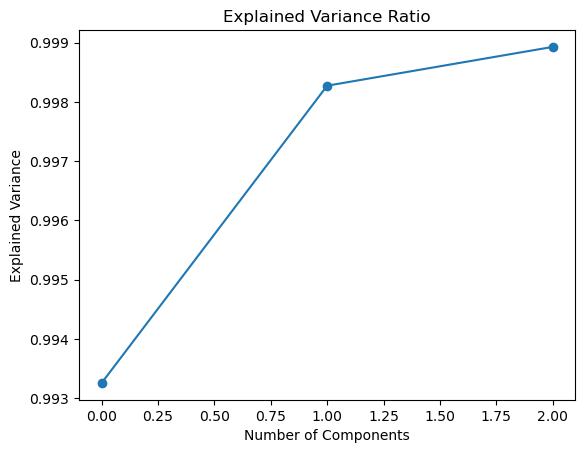

In [270]:
# encoder = enc
# Model : Create Lexicon to replace existing values with Lexicon values
# Also explore sbert.net to transform sentences to numbers based on semantic search

# PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize features by removing the mean and scaling to unit variance before PCA
    ('pca', PCA(n_components=3, random_state=42)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
# pca = PCA(n_components=3, random_state=42)
# X_train_encoded_pca = pca.fit_transform(X_train_encoded)
pipeline.fit(X_train_encoded)
print('PCA explained ratio: ', pca.explained_variance_ratio_)
X_train_encoded_pca = pipeline.transform(X_train_encoded)
print('U: ', X_train_encoded_pca[0])
print('Sigma: ', X_train_encoded_pca[1])
print('VT: ', X_train_encoded_pca[2])

print('PCA Transformed shape: ', X_train_encoded_pca.shape)

transformed_df = pd.DataFrame(X_train_encoded_pca, columns=['PCA ' + str(i+1) for i in range(X_train_encoded_pca.shape[1])])
print(transformed_df.head())

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.